Epoch 0, Loss: 0.7099, ||dW1||: 0.0101, ||dW2||: 0.0545
Epoch 100, Loss: 0.6926, ||dW1||: 0.0034, ||dW2||: 0.0015
Epoch 200, Loss: 0.6853, ||dW1||: 0.0116, ||dW2||: 0.0091
Epoch 300, Loss: 0.6164, ||dW1||: 0.0248, ||dW2||: 0.0215
Epoch 400, Loss: 0.5321, ||dW1||: 0.0173, ||dW2||: 0.0128
Final predictions:
[[0.064]
 [0.631]
 [0.645]
 [0.623]]


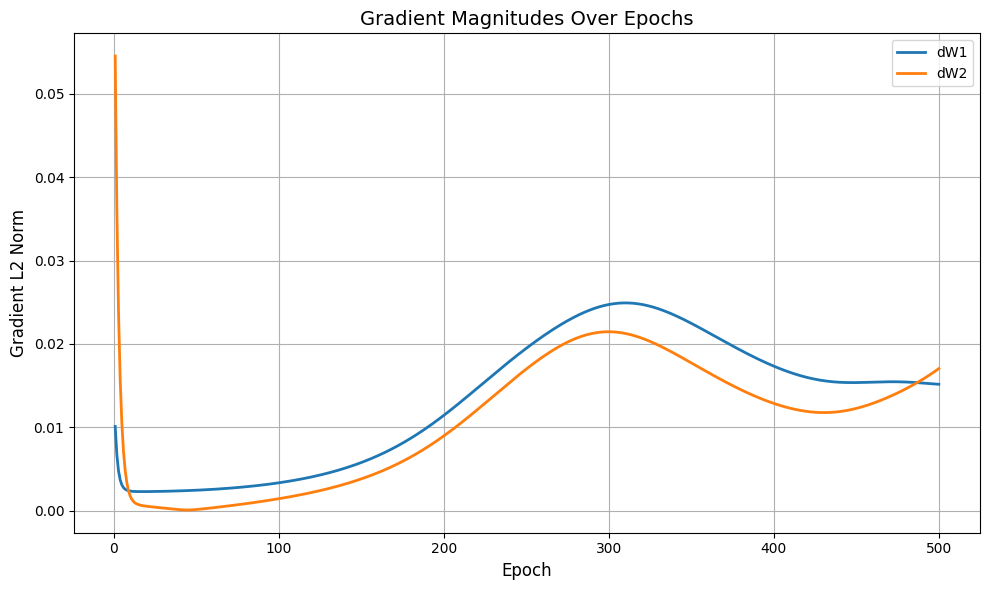

Epoch 0, Loss: 0.7099, ||dW1||: 0.0101, ||dW2||: 0.0545
Epoch 100, Loss: 0.7088, ||dW1||: 0.0097, ||dW2||: 0.0527
Epoch 200, Loss: 0.7078, ||dW1||: 0.0094, ||dW2||: 0.0509
Epoch 300, Loss: 0.7068, ||dW1||: 0.0091, ||dW2||: 0.0492
Epoch 400, Loss: 0.7060, ||dW1||: 0.0088, ||dW2||: 0.0476
Final predictions:
[[0.409]
 [0.431]
 [0.417]
 [0.44 ]]


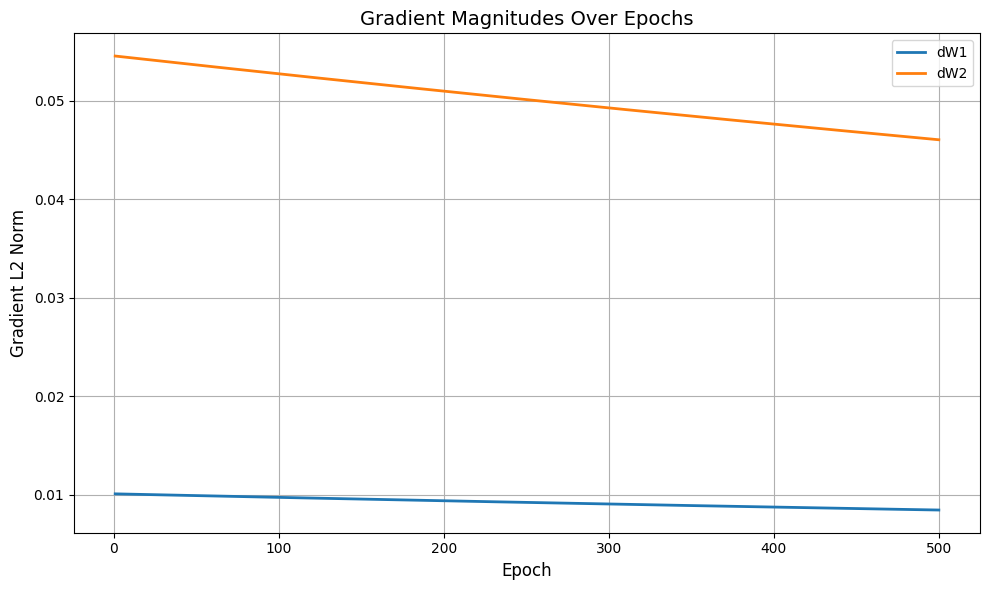

In [8]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

# XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])   # inputs
y = np.array([[0],[1],[1],[0]])           # labels

# Utility functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    # derivative with respect to activation output
    return a * (1 - a)

def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15  # avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))

def train(lr: float, include_plots: bool, nepochs: int = 500):
    # Network architecture
    np.random.seed(9)
    input_dim = 2
    hidden_dim = 2
    output_dim = 1

    # Initialize weights
    W1 = np.random.randn(input_dim, hidden_dim)
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim)
    b2 = np.zeros((1, output_dim))

    # Keys = layer names, Values = list of gradient norms per epoch
    gradient_history = defaultdict(list)

    # Training loop
    for epoch in range(nepochs):
        # ---- Forward pass ----
        z1 = np.dot(X, W1) + b1
        a1 = sigmoid(z1)

        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)   # final output

        # ---- Loss ----
        loss = binary_cross_entropy(y, a2)

        # ---- Backpropagation ----
        # Output layer error
        dz2 = a2 - y
        dW2 = np.dot(a1.T, dz2) / X.shape[0]
        db2 = np.mean(dz2, axis=0, keepdims=True)

        # Hidden layer error
        dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(a1)
        dW1 = np.dot(X.T, dz1) / X.shape[0]
        db1 = np.mean(dz1, axis=0, keepdims=True)

        # ---- Gradient norms logging ----
        grad_norm_W1 = np.linalg.norm(dW1)
        grad_norm_W2 = np.linalg.norm(dW2)
        gradient_history['dW1'].append(grad_norm_W1)
        gradient_history['dW2'].append(grad_norm_W2)

        # ---- Gradient descent update ----
        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2

        # Print progress occasionally
        if epoch % (nepochs // 5) == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}, ||dW1||: {grad_norm_W1:.4f}, ||dW2||: {grad_norm_W2:.4f}")

    # Final predictions
    print("Final predictions:")
    print(a2.round(3))

    if include_plots:
        # Create epoch indices
        epochs = list(range(1, len(next(iter(gradient_history.values()))) + 1))

        # Plot each layer’s gradient norms
        plt.figure(figsize=(10, 6))
        for layer, norms in gradient_history.items():
            plt.plot(epochs, norms, label=layer, linewidth=2)

        # Add labels, title, legend
        plt.xlabel("Epoch", fontsize=12)
        plt.ylabel("Gradient L2 Norm", fontsize=12)
        plt.title("Gradient Magnitudes Over Epochs", fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        # Show the plot
        plt.show()

train(1, True)
train(0.001, True)

A learing rate of 1 is high for most exercises. It provides fast learning but is unstable, as shown in the plot where the gradients start to oscillate without stabilizing. A learning rate of 0.001 is low for this particular exercise, as evidenced by the magnitudes of the gradients changing very slowly. There don't appear to be vanishing or exploding gradients since they stay within a range.

A better learning rate for this exercise is 0.1. Also, 500 is too few epochs. When trained with 10,000 epochs, the model performs well.

Epoch 0, Loss: 0.7099, ||dW1||: 0.0101, ||dW2||: 0.0545
Epoch 2000, Loss: 0.6851, ||dW1||: 0.0117, ||dW2||: 0.0092
Epoch 4000, Loss: 0.5314, ||dW1||: 0.0172, ||dW2||: 0.0128
Epoch 6000, Loss: 0.2763, ||dW1||: 0.0246, ||dW2||: 0.0365
Epoch 8000, Loss: 0.0535, ||dW1||: 0.0066, ||dW2||: 0.0122
Final predictions:
[[0.019]
 [0.972]
 [0.971]
 [0.028]]


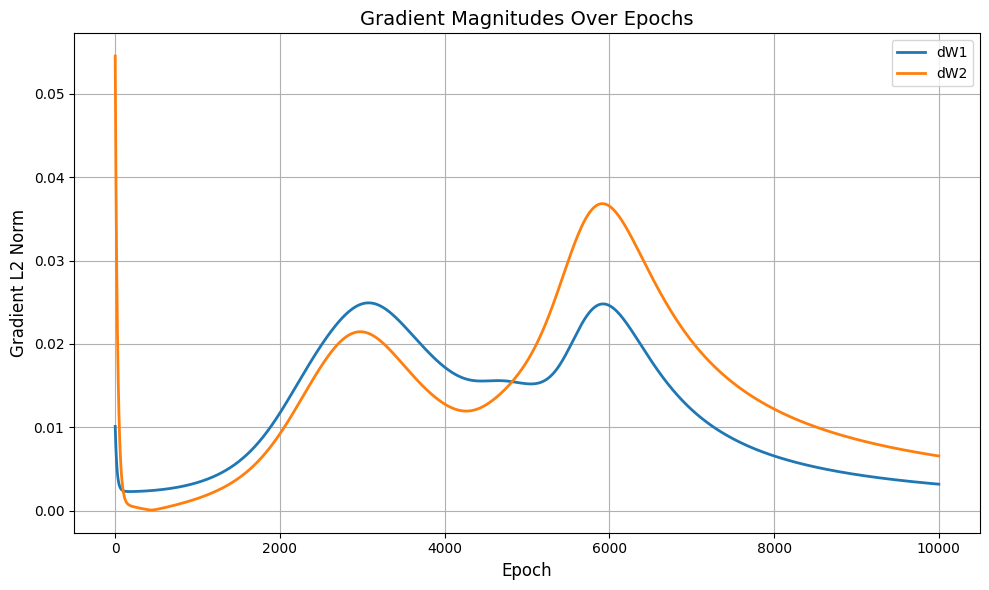

In [10]:
train(0.1, True, 10_000)